In [45]:
import sys
sys.path.append("..")
import pandas as pd
import numpy as np
from LeastSquare import LeastSquare as LS
from LinearRegression import LinearRegression as LR
import matplotlib.pyplot as plt

In [46]:
x = np.arange(-1, 1.1, 0.1)

In [47]:
f = lambda x: np.sin(np.pi*x)
y = f(x)

In [48]:
ns = 10
x_sample = np.random.choice(x, ns)

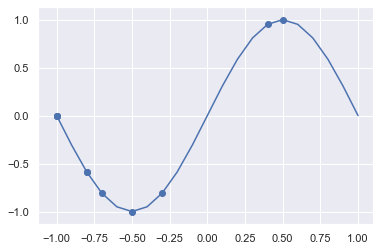

In [49]:
plt.plot(x, y)
plt.scatter(x_sample, f(x_sample))

In [50]:
y_sample = f(x_sample)

In [51]:
x_sample, y_sample

(array([-0.3, -0.8, -0.7, -1. , -1. , -0.8, -1. ,  0.5, -0.5,  0.4]),
 array([-8.09016994e-01, -5.87785252e-01, -8.09016994e-01, -1.22464680e-16,
        -1.22464680e-16, -5.87785252e-01, -1.22464680e-16,  1.00000000e+00,
        -1.00000000e+00,  9.51056516e-01]))

In [52]:
x_sample_aug = np.array([[1, i] for i in x_sample])

In [53]:
x_sample_aug

array([[ 1. , -0.3],
       [ 1. , -0.8],
       [ 1. , -0.7],
       [ 1. , -1. ],
       [ 1. , -1. ],
       [ 1. , -0.8],
       [ 1. , -1. ],
       [ 1. ,  0.5],
       [ 1. , -0.5],
       [ 1. ,  0.4]])

In [54]:
ls = LS(x_sample_aug, y_sample)

In [55]:
w = ls.parameters

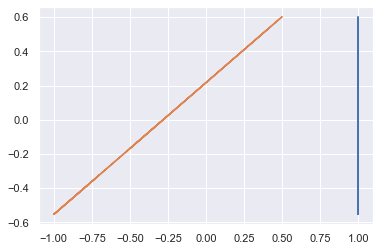

In [56]:
plt.plot(x_sample_aug, w.dot(x_sample_aug.T))

In [75]:
lr = LR(x_sample, y_sample, learning_rate=0.001, max_iteration=1000)

In [78]:
lrw = lr.parameters[-1]

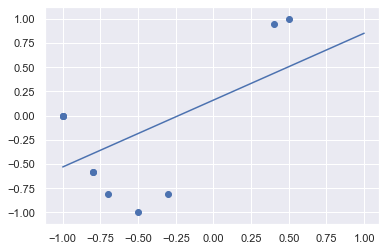

In [80]:
plt.plot(x, x*lrw[1] + lrw[0])
plt.scatter(x_sample, y_sample)